In [29]:
import pandas as pd

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [32]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


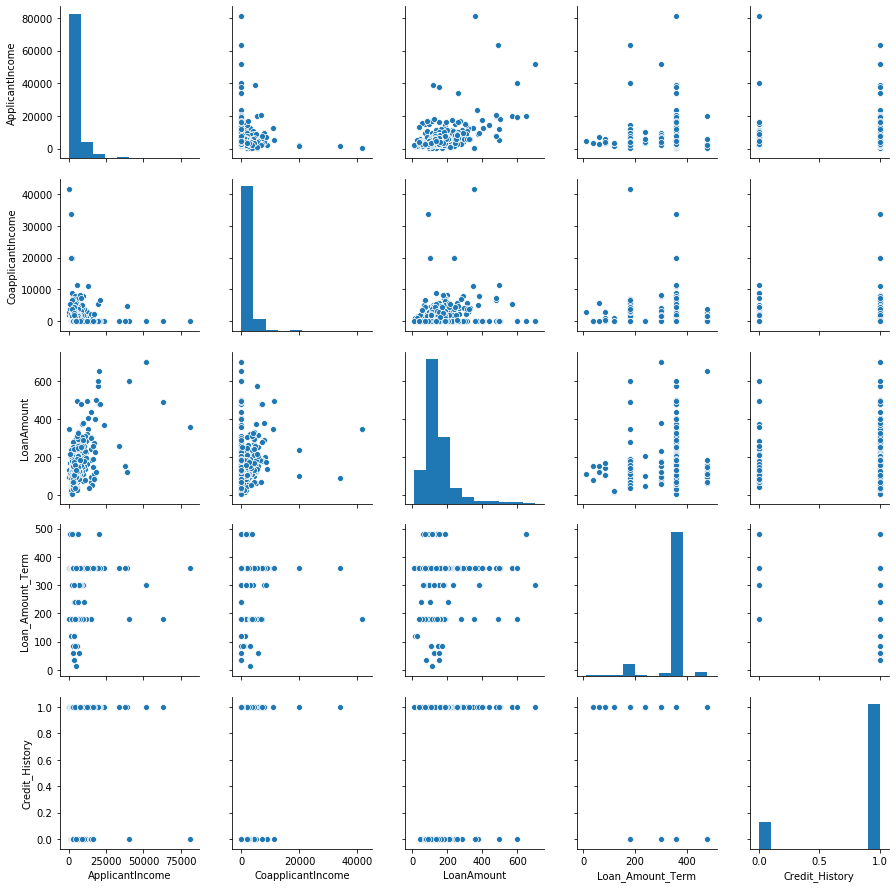

In [33]:
sns.pairplot(df)

In [34]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [35]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [36]:
from scipy.stats import mode
df['Gender'].fillna(mode(df['Gender']).mode[0],inplace=True)
df['Married'].fillna(mode(df['Married']).mode[0],inplace=True)
df['Dependents'].fillna(mode(df['Dependents']).mode[0],inplace=True)
df['Self_Employed'].fillna(mode(df['Self_Employed']).mode[0],inplace=True)
df['LoanAmount'].fillna(np.mean(df['LoanAmount']),inplace=True)
df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']),inplace=True)
df['Credit_History'].fillna(np.mean(df['Credit_History']),inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [37]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [38]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
lr=LabelEncoder()

In [41]:
df['Gender']=lr.fit_transform(df['Gender'])

In [42]:
df['Married']=lr.fit_transform(df['Married'])

In [43]:
df['Dependents']=lr.fit_transform(df['Dependents'])
df['Education']=lr.fit_transform(df['Education'])
df['Self_Employed']=lr.fit_transform(df['Self_Employed'])
df['Property_Area']=lr.fit_transform(df['Property_Area'])
df['Loan_Status']=lr.fit_transform(df['Loan_Status'])

In [44]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


In [45]:
df.drop(['Dependents','Property_Area','CoapplicantIncome'],axis=1,inplace=True)

In [46]:
df.dtypes

Gender                int32
Married               int32
Education             int32
Self_Employed         int32
ApplicantIncome       int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Loan_Status           int32
dtype: object

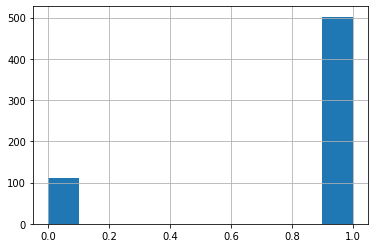

In [47]:
df['Gender'].hist()

In [48]:
X=[]
for i,j in df.iterrows():
    X.append([j['Gender'],j['Married'],j['Education'],j['Self_Employed'],j['ApplicantIncome'],j['LoanAmount'],j['Loan_Amount_Term'],j['Credit_History']])

In [49]:
df.dtypes

Gender                int32
Married               int32
Education             int32
Self_Employed         int32
ApplicantIncome       int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Loan_Status           int32
dtype: object

In [50]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [51]:
distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (614). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (614). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


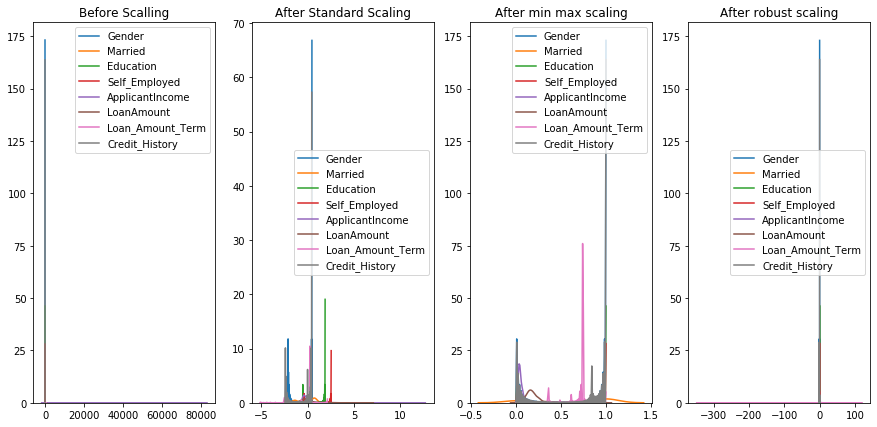

In [52]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(ncols=4, figsize=(15,7))

ax1.set_title('Before Scalling')
sns.kdeplot(df['Gender'],ax=ax1)
sns.kdeplot(df['Married'],ax=ax1)
sns.kdeplot(df['Education'],ax=ax1)
sns.kdeplot(df['Self_Employed'],ax=ax1)
sns.kdeplot(df['ApplicantIncome'],ax=ax1)
sns.kdeplot(df['LoanAmount'],ax=ax1)
sns.kdeplot(df['Loan_Amount_Term'],ax=ax1)
sns.kdeplot(df['Credit_History'],ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(distributions[1][1][:,0],label='Gender',ax=ax2)
sns.kdeplot(distributions[1][1][:,1],label='Married',ax=ax2)
sns.kdeplot(distributions[1][1][:,2],label='Education',ax=ax2)
sns.kdeplot(distributions[1][1][:,3],label='Self_Employed',ax=ax2)
sns.kdeplot(distributions[1][1][:,4],label='ApplicantIncome',ax=ax2)
sns.kdeplot(distributions[1][1][:,5],label='LoanAmount',ax=ax2)
sns.kdeplot(distributions[1][1][:,6],label='Loan_Amount_Term',ax=ax2)
sns.kdeplot(distributions[1][1][:,7],label='Credit_History',ax=ax2)

ax3.set_title('After min max scaling')
sns.kdeplot(distributions[2][1][:,0],label='Gender',ax=ax3)
sns.kdeplot(distributions[2][1][:,1],label='Married',ax=ax3)
sns.kdeplot(distributions[2][1][:,2],label='Education',ax=ax3)
sns.kdeplot(distributions[2][1][:,3],label='Self_Employed',ax=ax3)
sns.kdeplot(distributions[2][1][:,4],label='ApplicantIncome',ax=ax3)
sns.kdeplot(distributions[2][1][:,5],label='LoanAmount',ax=ax3)
sns.kdeplot(distributions[2][1][:,6],label='Loan_Amount_Term',ax=ax3)
sns.kdeplot(distributions[2][1][:,7],label='Credit_History',ax=ax3)

ax4.set_title('After robust scaling')
sns.kdeplot(distributions[4][1][:,0],label='Gender',ax=ax4)
sns.kdeplot(distributions[4][1][:,1],label='Married',ax=ax4)
sns.kdeplot(distributions[4][1][:,2],label='Education',ax=ax4)
sns.kdeplot(distributions[4][1][:,3],label='Self_Employed',ax=ax4)
sns.kdeplot(distributions[4][1][:,4],label='ApplicantIncome',ax=ax4)
sns.kdeplot(distributions[4][1][:,5],label='LoanAmount',ax=ax4)
sns.kdeplot(distributions[4][1][:,6],label='Loan_Amount_Term',ax=ax4)
sns.kdeplot(distributions[4][1][:,7],label='Credit_History',ax=ax4)

In [53]:
df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [54]:
X=df.drop('Loan_Status',axis=1)
Y=df['Loan_Status']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr=LogisticRegression()

In [59]:
lr.fit(X_train,Y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
pred=lr.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(Y_test,pred)

0.8162162162162162


# Decision tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtree=DecisionTreeClassifier()

In [65]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
y_pred=dtree.predict(X_test)

In [67]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1])

In [68]:
accuracy_score(Y_test,y_pred)

0.6972972972972973

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.62      0.58        61
           1       0.80      0.73      0.76       124

    accuracy                           0.70       185
   macro avg       0.67      0.68      0.67       185
weighted avg       0.71      0.70      0.70       185



# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
rfc_pred=rfc.predict(X_test)

In [73]:
accuracy_score(Y_test,rfc_pred)

0.7783783783783784

In [74]:
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.73      0.52      0.61        61
           1       0.79      0.90      0.85       124

    accuracy                           0.78       185
   macro avg       0.76      0.71      0.73       185
weighted avg       0.77      0.78      0.77       185



# KNN

In [75]:
from sklearn import neighbors,preprocessing

In [76]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [78]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
y_predi= knn.predict(X_test)
accuracy_score(Y_test, y_predi)

0.7783783783783784

# Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
nb=GaussianNB()

In [82]:
nb.fit(X_train,Y_train)
predection=nb.predict(X_test)

In [83]:
accuracy_score(Y_test,predection)

0.8108108108108109

# SVM

In [84]:
from sklearn.svm import SVC

In [85]:
svm=SVC(kernel='linear',C=0.025,random_state=101)
svm.fit(X_train,Y_train)
svm_pred=svm.predict(X_test)

In [86]:
accuracy_score(Y_test,svm_pred)

0.8108108108108109